# Post-process of calibration

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
%cd ..

c:\Users\tsutsui\Projects\ar6-tlm


c:\Users\tsutsui\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
# mce is available in https://github.com/tsutsui1872/mce 
sys.path.append('../mce')

In [4]:
from src.plot import MyPlot # depends on mce module

# Read results

Output of 010_cmip6_preprocess.ipynb

In [11]:
df_cmip6_norm1 = (
    pd.read_csv('./dataout/cmip6_normalized_1.csv', index_col=[0, 1, 2])
    .rename(columns=float)
)
df_cmip6_norm1

0.5       1.5       2.5       3.5    \
ACCESS-CM2  rtnt 1pctCO2       0.114668 -0.261170  0.364576  0.088614   
                 abrupt-4xCO2  7.384659  6.016853  5.279721  4.393673   
                 piControl    -0.045634  0.069533  0.033489 -0.003574   
            tas  1pctCO2       0.054810  0.026279 -0.027704  0.069290   
                 abrupt-4xCO2  1.077539  2.020234  2.329260  2.751447   
...                                 ...       ...       ...       ...   
UKESM1-0-LL rtnt abrupt-4xCO2  6.642358  5.841489  6.081244  5.399344   
                 piControl    -0.389239 -0.103244  0.566915 -0.098268   
            tas  1pctCO2       0.278635  0.140545  0.139373  0.124382   
                 abrupt-4xCO2  1.592799  2.120007  2.477257  3.003281   
                 piControl     0.356997  0.102347  0.117881  0.199185   

                                  4.5       5.5       6.5       7.5    \
ACCESS-CM2  rtnt 1pctCO2      -0.240797  0.032865  0.120728 -0.226226   
                 abrupt-4xCO2  5.090981  4.623253  4.417217  3.851686   
                 piControl    -0.040072 -0.041262 -0.376436 -0.301819   
            tas  1pctCO2       0.099759 -0.006149  0.038062  0.149160   
                 abrupt-4xCO2  2.818698  3.189038  3.482845  3.655235   
...                                 ...       ...       ...       ...   
UKESM1-0-LL rtnt abrupt-4xCO2  4.894980  4.545263  4.808677  4.775186   
                 piControl     0.044639 -0.024439 -0.189297  0.313945   
            tas  1pctCO2       0.088125  0.209777  0.235321  0.422771   
                 abrupt-4xCO2  3.480784  3.627754  3.621646  3.835658   
                 piControl     0.099007  0.139270  0.119387 -0.053199   

                                  8.5       9.5    ...  357.5  358.5  359.5  \
ACCESS-CM2  rtnt 1pctCO2       0.477206  0.306030  ...    NaN    NaN    NaN   
                 abrupt-4xCO2  4.005168  3.914475  ...    NaN    NaN    NaN   
                 piControl     0.061253 -0.441146  ...    NaN    NaN    NaN   
            tas  1pctCO2       0.034585  0.050589  ...    NaN    NaN    NaN   
                 abrupt-4xCO2  3.620542  3.825483  ...    NaN    NaN    NaN   
...                                 ...       ...  ...    ...    ...    ...   
UKESM1-0-LL rtnt abrupt-4xCO2  4.019885  4.107933  ...    NaN    NaN    NaN   
                 piControl    -0.125782  0.195047  ...    NaN    NaN    NaN   
            tas  1pctCO2       0.364995  0.319772  ...    NaN    NaN    NaN   
                 abrupt-4xCO2  4.241149  4.431383  ...    NaN    NaN    NaN   
                 piControl    -0.061748 -0.083119  ...    NaN    NaN    NaN   

                               360.5  361.5  362.5  363.5  364.5  365.5  366.5  
ACCESS-CM2  rtnt 1pctCO2         NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 abrupt-4xCO2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 piControl       NaN    NaN    NaN    NaN    NaN    NaN    NaN  
            tas  1pctCO2         NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 abrupt-4xCO2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
...                              ...    ...    ...    ...    ...    ...    ...  
UKESM1-0-LL rtnt abrupt-4xCO2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 piControl       NaN    NaN    NaN    NaN    NaN    NaN    NaN  
            tas  1pctCO2         NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 abrupt-4xCO2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                 piControl       NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[266 rows x 367 columns]

Output of 020_calibration.ipynb

In [12]:
df_parms_calib = (
    pd.read_csv('./dataout/parms_calib.csv', index_col=[0, 1])
    .unstack(0)
)
df_parms_calib

q4x                         lamg                    \
Method                ar6    mce-2l      s21       ar6    mce-2l     s21   
Dataset                                                                    
ACCESS-CM2       7.733057  6.878696   7.6581  0.699488  0.739969  0.6877   
ACCESS-ESM1-5    6.745166  5.800981   6.9731  0.712660  0.762439  0.7214   
AWI-CM-1-1-MR    8.168461  7.292392   8.4080  1.209335  1.160470  1.2981   
BCC-CSM2-MR      7.217011  5.994669   6.8870  1.143931  0.979157  1.0601   
BCC-ESM1         6.488241  6.022407   6.6794  0.892194  0.923221  0.9350   
CAMS-CSM1-0      9.076223  7.973425   8.8829  1.917556  1.732842  1.8751   
CAS-ESM2-0            NaN       NaN   7.1346       NaN       NaN  0.9282   
CESM2            8.478362  6.487284   8.8426  0.658886  0.628114  0.7186   
CESM2-FV2        7.707721  5.681416   7.9362  0.581514  0.552648  0.5592   
CESM2-WACCM      7.856972  6.671135   8.2798  0.705814  0.713901  0.7344   
CESM2-WACCM-FV2  7.011729  5.748016   7.1276  0.601681  0.591878  0.5936   
CIESM                 NaN  7.963521   8.9425       NaN  0.718404  0.7152   
CMCC-CM2-SR5          NaN  7.310179      NaN       NaN  1.020552     NaN   
CNRM-CM6-1       7.305305  7.326335   7.5059  0.751222  0.748430  0.7697   
CNRM-CM6-1-HR    7.523272  7.708433   7.5314  0.940570  0.880724  0.9427   
CNRM-ESM2-1      5.797400  5.990201   5.7027  0.633740  0.622978  0.6321   
CanESM5          7.467506  7.283649   7.6149  0.646137  0.646104  0.6585   
E3SM-1-0         7.396112  6.672910   7.4155  0.629308  0.635473  0.6381   
EC-Earth3             NaN  6.354394   7.3660       NaN  0.748208  0.8228   
EC-Earth3-Veg         NaN  7.032024   7.8140       NaN  0.831575  0.8550   
FGOALS-f3-L      9.840465  7.928825   9.5356  1.501479  1.301692  1.4323   
FGOALS-g3        7.972359  6.919027   7.8715  1.283779  1.200461  1.2821   
GFDL-CM4         7.658726  6.575151   8.4511  0.822550  0.854816  0.8888   
GFDL-ESM4        7.450284  7.246687   7.3355  1.460192  1.350569  1.2741   
GISS-E2-1-G      8.292052  7.149193   8.1084  1.499887  1.263636  1.4609   
GISS-E2-1-H      7.300777  6.770699   7.5798  1.140782  1.069897  1.1675   
GISS-E2-2-G      7.192669  6.455291   7.2482  1.642447  1.264336  1.6284   
HadGEM3-GC31-LL  7.370973  7.193884   7.4570  0.624395  0.662558  0.6236   
HadGEM3-GC31-MM  7.103402  7.213582   7.3703  0.652831  0.669369  0.6665   
IITM-ESM         9.436749  8.626054   9.2478  1.942847  1.798402  1.9323   
INM-CM4-8             NaN  5.350834   6.2508       NaN  1.458254  1.6883   
INM-CM5-0        6.377653       NaN   6.3507  1.613558       NaN  1.5876   
IPSL-CM6A-LR     7.812110  6.876271   7.5224  0.691037  0.758461  0.7635   
MCM-UA-1-0            NaN       NaN   7.1164       NaN       NaN  1.0436   
MIROC-ES2L       8.167849  7.306803   7.9782  1.557887  1.300439  1.5379   
MIROC6           7.884622  6.768413   7.7304  1.423914  1.252740  1.3612   
MPI-ESM1-2-HR    8.183147  7.398389   8.6334  1.271267  1.250437  1.3359   
MPI-ESM1-2-LR         NaN  8.385191   9.2784       NaN  1.384468  1.4608   
MRI-ESM2-0       8.295757  6.696558   8.0336  1.200057  1.048738  1.2023   
NESM3                 NaN  8.260280   7.7214       NaN  0.902402  0.8349   
NorCPM1               NaN  6.848051      NaN       NaN  1.147503     NaN   
NorESM2-LM       9.532072  6.615321  10.2131  0.926445  1.276142  1.7696   
NorESM2-MM       8.902345  7.072782   9.3908  1.543341  1.389735  1.6922   
SAM0-UNICON      8.046759  7.255909   8.6945  1.033618  0.943384  1.1351   
TaiESM1               NaN  7.272367   8.5134       NaN  0.811419  0.9165   
UKESM1-0-LL      7.476424  7.299849   7.6100  0.663284  0.687853  0.6826   

                      cdeep                             cmix  ...       q2x  \
Method                  ar6      mce-2l       s21        ar6  ...       s21   
Dataset                                                       ...             
ACCESS-CM2        93.230040   71.639335   97.4564   8.705751

## Plot settings

In [13]:
plt = MyPlot()

In [15]:
map_name_unit = {
    'rtnt': '{} ({})'.format('TOA net radiation', 'Wm$^{−2}'),
    'tas': '{} ({})'.format('Temperature change', '°C'),
}

In [20]:
colors_dark = [
    '#001c7f', '#b1400d', '#12711c', '#8c0800', '#591e71',
    '#592f0d', '#a23582', '#3c3c3c', '#b8850a', '#006374',
]
color_4x = 'C1'
color_1p = 'C0'
color_4x_dark = colors_dark[1]
color_1p_dark = colors_dark[0]
ls_esm = {
    'ls': 'None', 'mfc': 'none', 'ms': 4, 'mew': 0.6, 'alpha': 0.8,
}
map_ls = {
    ('ESM', 'abrupt-4xCO2'): {'color': color_4x, 'marker': 's', **ls_esm},
    ('ESM', '1pctCO2'): {'color': color_1p, 'marker': '^', **ls_esm},
    'IRM 4x': {'color': color_4x_dark, 'lw': 1.5},
    'IRM 1p': {'color': color_1p_dark, 'lw': 1.5},
    'TCR AR6': { # AR6 Table 7.SM.5
        'ls': 'None', 'mfc': 'none', 'mec': 'k', 'ms': 10,
        'mew': 1.5, 'marker': '+',
    },
    'TCR ESM': { # 20-yr mean in years 60 to 79
        'color': 'C0', 'lw': 1.5,
    },
    'TCR IRM': {
        'ls': 'None', 'mfc': 'w', 'mec': color_1p_dark, 'ms': 5,
        'mew': 1., 'marker': 'o',
    },
    't4x': {
        'ls': 'None', 'mfc': 'w', 'mec': color_4x_dark, 'ms': 5,
        'mew': 1., 'marker': 'o'},
}
map_length = {
    'abrupt-4xCO2': 150,
    '1pctCO2': 140,
}

## Plot Δ-N and Δ-T

In [ ]:

experiment_id = 'abrupt-4xCO2'
source_id = 'IPSL-CM6A-LR'
variable_id = 'rtnt'
df_cmip6_norm1.loc[(source_id, variable_id, experiment_id), :150]

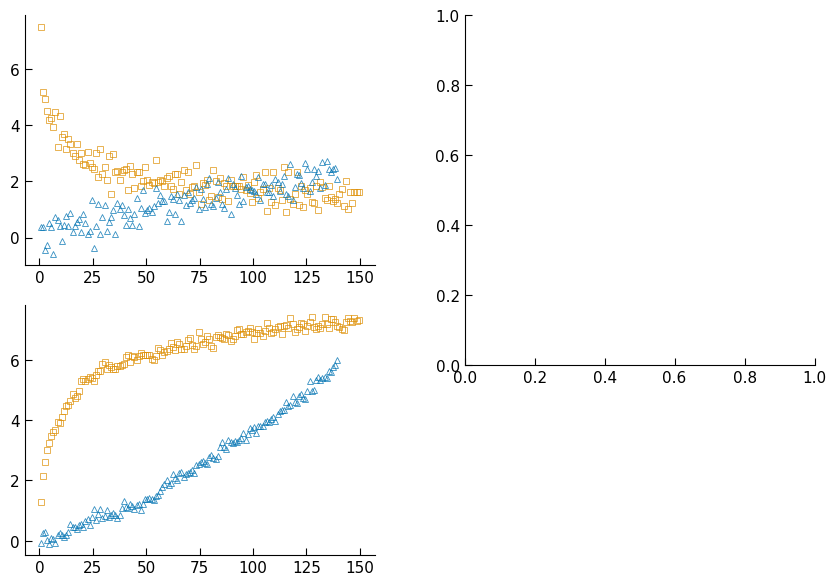

In [22]:
height = 2.5
aspect = 1.4
wspace = 0.9
hspace = 0.4
kw1 = {
    'height': height*aspect, 'aspect': 1.,
    'yoff': height*2 + hspace - height*aspect,
}
plt.init_general(
    height=height, aspect=aspect, wspace=wspace, hspace=hspace,
    extend=[('bottom', -1, {}), ('right', -1, kw1)],
)

source_id = 'IPSL-CM6A-LR'

for i, variable_id in enumerate(['rtnt', 'tas']):
    ax = plt(i)
    for experiment_id in ['abrupt-4xCO2', '1pctCO2']:
        (
            df_cmip6_norm1
            .loc[(source_id, variable_id, experiment_id), :map_length[experiment_id]]
            .plot(ax=ax, **map_ls[('ESM', experiment_id)])
        )

In [ ]:
class PlotWrapper:
    def __init__(self, **kw):
        self.outdir_png = None
        self.outdir_pdf = None

        for k, v in kw.items():
            setattr(self, k, v)

        self.map_model = {
            'AR6 Chapter 7': 'EBM-ε AR6',
            'Smith_ea_2021': 'EBM-ε S21',
        }

    def wrap_plot(self, dataset):
        df_esm = self.df_esm.loc[dataset]
        df_4x = self.df_4x.loc[dataset]
        df_1p = self.df_1p.loc[dataset]
        d_sens = self.d_sens.loc[dataset]
        map_ls = self.map_ls
        map_vname = self.map_vname

        height = 2.5
        aspect = 1.4
        wspace = 0.9
        hspace = 0.4
        kw1 = {
            'height': height*aspect, 'aspect': 1.,
            'yoff': height*2 + hspace - height*aspect,
        }
        myplt.init_general(
            height=height, aspect=aspect, wspace=wspace, hspace=hspace,
            extend=[('bottom', -1, {}), ('right', -1, kw1)],
        )

        idx_model = df_4x.index.get_level_values('Model').unique().intersection(
            df_1p.index.get_level_values('Model').unique()
        )
        models_order = ['AR6 Chapter 7', 'Smith_ea_2021', 'MCE-2l']
        map_ls_add = dict(zip(models_order, ['-', '-.', '--']))

        time_esm = np.arange(150) + 0.5

        for n, var1 in enumerate(['rtnt', 'tas']):
            ax = myplt(n)
            ax.plot(
                time_esm,
                df_esm.loc[(var1, 'abrupt-4xCO2')].dropna().values,
                **map_ls['ESM 4x'],
            )
            ax.plot(
                time_esm[:140],
                df_esm.loc[(var1, '1pctCO2')].dropna().values,
                **map_ls['ESM 1p'],
            )

            for model in models_order:
                if model not in idx_model:
                    continue

                kw = map_ls['IRM 4x'].copy()
                kw.update(ls=map_ls_add[model])
                df_4x.loc[(model, var1), :149.5].plot(ax=ax, **kw)

                kw = map_ls['IRM 1p'].copy()
                kw.update(ls=map_ls_add[model])
                df_1p.loc[(model, var1)].plot(ax=ax, **kw)

            ax.set_ylabel('{} ({})'.format(*map_vname[var1]))
            ax.grid()

        ax.hlines( # zero-based 60-79 years
            d_sens.loc[('ESM', 'tcr')], 59., 79., **map_ls['TCR ESM'],
        )
        tp_2x = np.log(2) / np.log(1.01)
        for model in models_order:
            if model not in idx_model:
                continue

            ax.plot(tp_2x, d_sens.loc[(model, 'tcr')], **map_ls['TCR IRM'])

        ax.legend(
            [
                mpl.lines.Line2D([0], [0], **map_ls['TCR ESM']),
                mpl.lines.Line2D([0], [0], **map_ls['TCR IRM']),
            ],
            ['ESM 60–79 mean', 'TCR analytical'],
            labelspacing=0.2,
        )

        ax = myplt(2)
        var_x, var_y = 'tas', 'rtnt'
        ax.plot(
            df_esm.loc[(var_x, 'abrupt-4xCO2')].dropna().values,
            df_esm.loc[(var_y, 'abrupt-4xCO2')].dropna().values,
            label='ESM, 4x', **map_ls['ESM 4x'],
        )
        ax.plot(
            df_esm.loc[(var_x, '1pctCO2')].dropna().values,
            df_esm.loc[(var_y, '1pctCO2')].dropna().values,
            label='ESM, 1p', **map_ls['ESM 1p'],
        )

        for model in models_order:
            if model not in idx_model:
                continue

            kw = map_ls['IRM 4x'].copy()
            kw.update(ls=map_ls_add[model])
            model_l = self.map_model.get(model, model)
            ax.plot(
                df_4x.loc[(model, var_x)].values,
                df_4x.loc[(model, var_y)].values,
                label=f'{model_l}, 4x', **kw,
            )
            # ax.plot(d_sens.loc[(model, 't4x')], 0., **map_ls['t4x'])

            kw = map_ls['IRM 1p'].copy()
            kw.update(ls=map_ls_add[model])
            ax.plot(
                df_1p.loc[(model, var_x)].values,
                df_1p.loc[(model, var_y)].values,
                label=f'{model_l}, 1p', **kw,
            )

        kw = map_ls['IRM 4x'].copy()
        kw.update(color='k')
        handles = [
            mpl.lines.Line2D([0], [0], **map_ls['ESM 4x']),
            mpl.lines.Line2D([0], [0], **map_ls['ESM 1p']),
            mpl.lines.Line2D([0], [0], **map_ls['IRM 4x']),
            mpl.lines.Line2D([0], [0], **map_ls['IRM 1p']),
            mpl.patches.Patch(alpha=0, linewidth=0),
        ] + [
            mpl.lines.Line2D([0], [0], ls=map_ls_add[model], **kw)
            for model in models_order
        ]
        labels = [
            'ESM 4x',
            'ESM 1p',
            'Emulator 4x',
            'Emulator 1p',
            '',
        ] + [
            '#{} {}'.format(i+1, self.map_model.get(model, model))
            for i, model in enumerate(models_order)
        ]
        # ax.legend(labelspacing=0.2)
        ax.legend(handles, labels, labelspacing=0.2)

        ax.set_xlabel('{} ({})'.format(*map_vname[var_x]))
        ax.set_ylabel('{} ({})'.format(*map_vname[var_y]))
        ax.grid()

        myplt.panel_label(
            xy=(0., 1.),
            xytext=(-35, 0),
            ha='right', va='center',
        )

        ax = myplt(0)
        loc_upper_left = (
            ax.transAxes + ax.figure.transFigure.inverted()
        ).transform((0, 1))
        myplt.figure.text(
            loc_upper_left[0], loc_upper_left[1] + 0.02, dataset,
            ha='left', va='bottom', size='large',
        )

        if self.outdir_png is not None:
            myplt.savefig('{}/024__n-t__{}.png'.format(self.outdir_png, dataset))

        if self.outdir_pdf is not None:
            myplt.savefig('{}/024__n-t__{}.pdf'.format(self.outdir_pdf, dataset))


obj = PlotWrapper(
    df_esm=df_cmip6_norm1,
    df_4x=df_4x,
    df_1p=df_1p,
    d_sens=d_sens,
    map_ls=map_ls,
    map_vname=map_vname,
    outdir_png='./image',